# Set Parameter
- Attention = [None, Luong]
- Teacher Forcing Ratio = 0.5
- Layer = 1
- Batch size = 32
- Drop out = 0.2
- Hidden unit = 50
- Epochs = 100
- N = 100
- Data Length = 100K
- Single
- Deduplication

# Import packages

import useful packages for experiments

In [1]:
import os
import argparse
import logging

import torch
from torch.optim.lr_scheduler import StepLR
import torchtext

from trainer.supervised_trainer_unmatching import SupervisedTrainer_unmatching
from models.encoderRNN import EncoderRNN
from models.decoderRNN import DecoderRNN
from models.seq2seq import Seq2seq
from loss.loss import Perplexity
from optim.optim import Optimizer
from dataset import fields
from evaluator.predictor import Predictor

import matplotlib.pyplot as plt

/home/hyeontae/hyeontae/venv2/lib/python3.5/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
/home/hyeontae/hyeontae/venv2/lib/python3.5/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


# Log format

In [2]:
log_level = 'info'
LOG_FORMAT = '%(asctime)s %(levelname)-6s %(message)s'
logging.basicConfig(format=LOG_FORMAT, level=getattr(logging, log_level.upper()))

In [3]:
character_accuracy = []
sentance_accuracy = []
f1_score = []

In [4]:
train_path = "data/palindrome_dedup/unMatching_single/data_train.txt"
dev_path = "data/palindrome_dedup/unMatching_single/data_test.txt"

src = fields.SourceField()
tgt = fields.TargetField()
max_len = 104
def len_filter(example):
    return len(example.src) <= max_len and len(example.tgt) <= max_len
train = torchtext.data.TabularDataset(
    path=train_path, format='tsv',
    fields=[('src', src), ('tgt', tgt)],
    filter_pred=len_filter
)
dev = torchtext.data.TabularDataset(
    path=dev_path, format='tsv',
    fields=[('src', src), ('tgt', tgt)],
    filter_pred=len_filter
)
src.build_vocab(train)
tgt.build_vocab(train)
input_vocab = src.vocab
output_vocab = tgt.vocab

weight = torch.ones(len(tgt.vocab))
pad = tgt.vocab.stoi[tgt.pad_token]
loss = Perplexity(weight, pad)
if torch.cuda.is_available():
    loss.cuda()
    
optimizer = "Adam"
hidden_size = 50
bidirectional = True

/home/hyeontae/hyeontae/venv2/lib/python3.5/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


# Prepare dataset

In [ ]:
print("None Att")

seq2seq = None
encoder = EncoderRNN(len(src.vocab), max_len, hidden_size,
                    bidirectional=bidirectional, variable_lengths=True)
decoder = DecoderRNN(len(tgt.vocab), max_len, hidden_size * 2 if bidirectional else hidden_size,
                     dropout_p=0.2, use_attention=None, bidirectional=bidirectional,
                     eos_id=tgt.eos_id, sos_id=tgt.sos_id)
seq2seq = Seq2seq(encoder, decoder)
if torch.cuda.is_available():
    seq2seq.cuda()

for param in seq2seq.parameters():
    param.data.uniform_(-0.08, 0.08)

# train
t = SupervisedTrainer_unmatching(loss=loss, batch_size=32,
                      checkpoint_every=50,
                      print_every=100,
                      hidden_size=hidden_size,
                      path="palindrome_dedup_unMatching_single_parameter/None_att")

seq2seq, ave_loss, character_accuracy_list, sentance_accuracy_list, f1_score_list = t.train(seq2seq, train,
                                                                             num_epochs=100, dev_data=dev,
                                                                             optimizer=optimizer,
                                                                             teacher_forcing_ratio=0.5)

character_accuracy.append(character_accuracy_list)
sentance_accuracy.append(sentance_accuracy_list)
f1_score.append(f1_score_list)

torch.save(seq2seq.state_dict(), 'log/pth/palindrome_dedup_unMatching_single_parameter_no_att_model_save.pth')

/home/hyeontae/hyeontae/venv2/lib/python3.5/site-packages/torch/nn/modules/rnn.py:46: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
2019-03-20 18:30:52,316 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None


None Att


2019-03-20 18:33:42,301 INFO   Finished epoch 1: Train loss: 1.2642, Dev loss: 1.0721, Accuracy(character): 0.9885, Accuracy(sentance): 0.5811, F1 Score: 0.8268
2019-03-20 18:36:33,583 INFO   Finished epoch 2: Train loss: 1.1148, Dev loss: 1.0713, Accuracy(character): 0.9885, Accuracy(sentance): 0.5812, F1 Score: 0.8269
2019-03-20 18:39:25,024 INFO   Finished epoch 3: Train loss: 1.1135, Dev loss: 1.0713, Accuracy(character): 0.9885, Accuracy(sentance): 0.5812, F1 Score: 0.8269
2019-03-20 18:42:16,854 INFO   Finished epoch 4: Train loss: 1.1136, Dev loss: 1.0713, Accuracy(character): 0.9885, Accuracy(sentance): 0.5812, F1 Score: 0.8269
2019-03-20 18:45:07,720 INFO   Finished epoch 5: Train loss: 1.1131, Dev loss: 1.0709, Accuracy(character): 0.9885, Accuracy(sentance): 0.5812, F1 Score: 0.8269
2019-03-20 18:47:59,475 INFO   Finished epoch 6: Train loss: 1.1131, Dev loss: 1.0714, Accuracy(character): 0.9885, Accuracy(sentance): 0.5812, F1 Score: 0.8269
2019-03-20 18:50:50,890 INFO   Fin

2019-03-21 09:43:02,179 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None


Luong Att


2019-03-21 09:46:20,697 INFO   Finished epoch 1: Train loss: 1.2675, Dev loss: 1.0746, Accuracy(character): 0.9885, Accuracy(sentance): 0.5813, F1 Score: 0.8269
2019-03-21 09:49:40,690 INFO   Finished epoch 2: Train loss: 1.1203, Dev loss: 1.0720, Accuracy(character): 0.9885, Accuracy(sentance): 0.5812, F1 Score: 0.8269
2019-03-21 09:52:59,000 INFO   Finished epoch 3: Train loss: 1.1158, Dev loss: 1.0711, Accuracy(character): 0.9885, Accuracy(sentance): 0.5813, F1 Score: 0.8269
2019-03-21 09:56:18,231 INFO   Finished epoch 4: Train loss: 1.1141, Dev loss: 1.0716, Accuracy(character): 0.9885, Accuracy(sentance): 0.5812, F1 Score: 0.8269
2019-03-21 09:59:36,554 INFO   Finished epoch 5: Train loss: 1.1179, Dev loss: 1.0711, Accuracy(character): 0.9885, Accuracy(sentance): 0.5811, F1 Score: 0.8269
2019-03-21 10:02:55,492 INFO   Finished epoch 6: Train loss: 1.1133, Dev loss: 1.0717, Accuracy(character): 0.9885, Accuracy(sentance): 0.5813, F1 Score: 0.8269
2019-03-21 10:06:13,123 INFO   Fin

2019-03-21 12:37:19,815 INFO   Finished epoch 52: Train loss: 1.0207, Dev loss: 1.0278, Accuracy(character): 0.9946, Accuracy(sentance): 0.8132, F1 Score: 0.9330
2019-03-21 12:40:42,183 INFO   Finished epoch 53: Train loss: 1.0207, Dev loss: 1.0282, Accuracy(character): 0.9946, Accuracy(sentance): 0.8150, F1 Score: 0.9329
2019-03-21 12:44:03,498 INFO   Finished epoch 54: Train loss: 1.0201, Dev loss: 1.0280, Accuracy(character): 0.9947, Accuracy(sentance): 0.8183, F1 Score: 0.9326
2019-03-21 12:47:26,404 INFO   Finished epoch 55: Train loss: 1.0200, Dev loss: 1.0273, Accuracy(character): 0.9947, Accuracy(sentance): 0.8196, F1 Score: 0.9332
2019-03-21 12:50:47,367 INFO   Finished epoch 56: Train loss: 1.0196, Dev loss: 1.0272, Accuracy(character): 0.9946, Accuracy(sentance): 0.8189, F1 Score: 0.9330
2019-03-21 12:54:09,414 INFO   Finished epoch 57: Train loss: 1.0189, Dev loss: 1.0319, Accuracy(character): 0.9942, Accuracy(sentance): 0.8070, F1 Score: 0.9275
2019-03-21 12:57:31,277 INFO

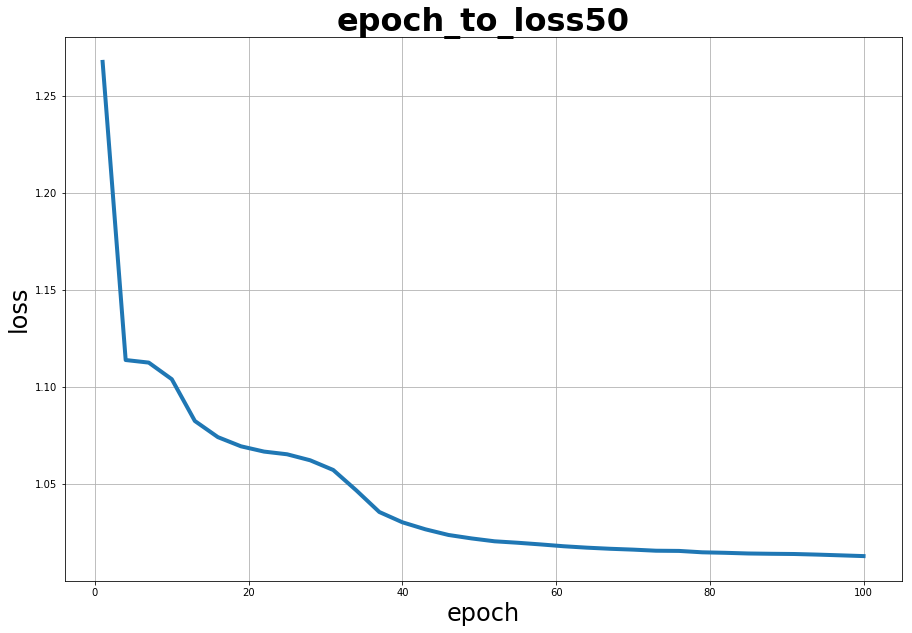

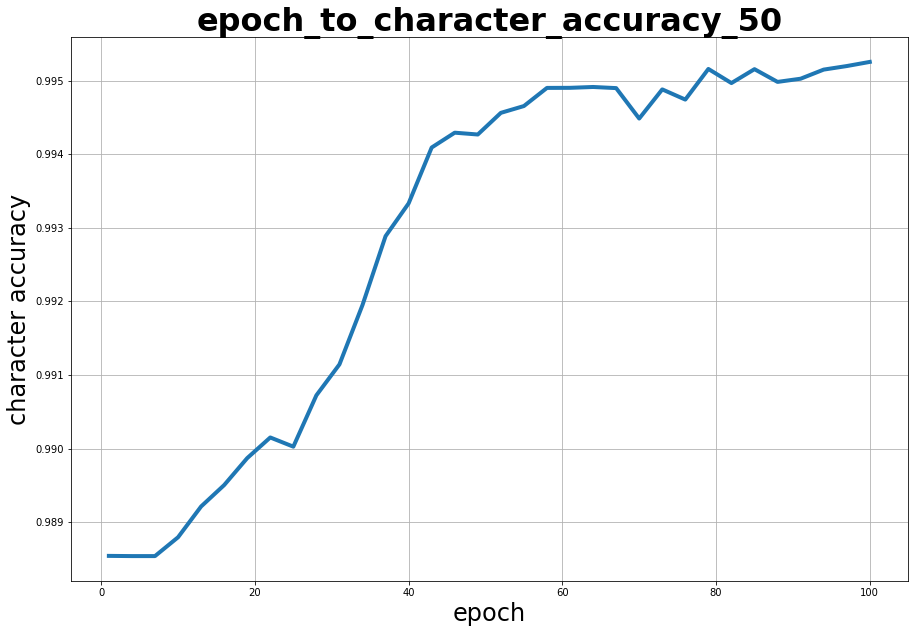

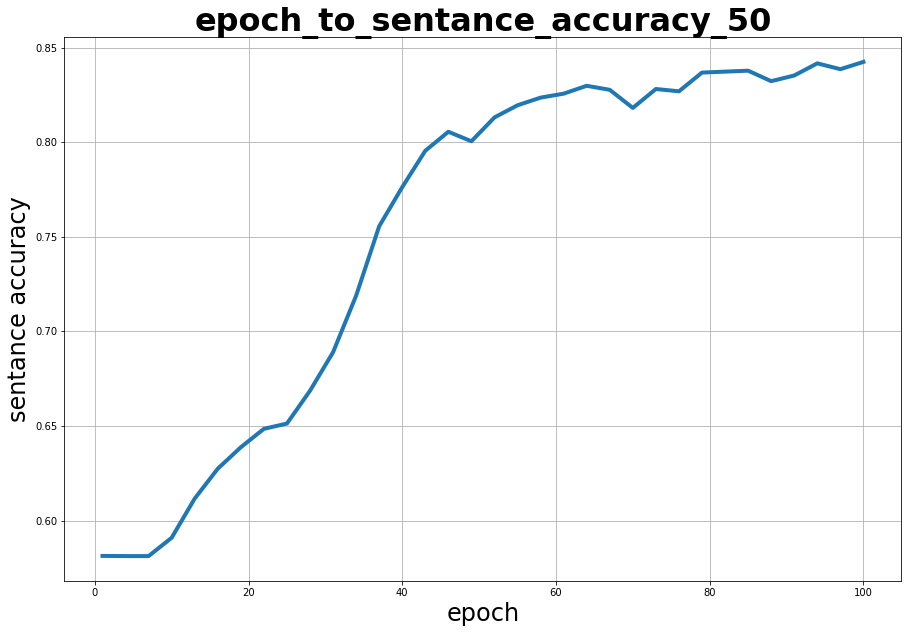

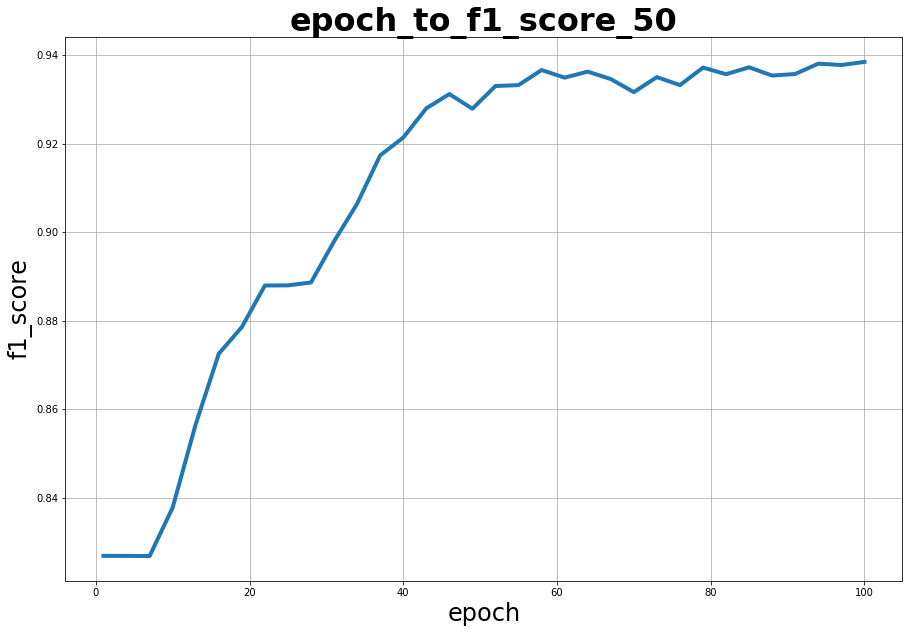

In [11]:
print("Luong Att")

seq2seq = None
encoder = EncoderRNN(len(src.vocab), max_len, hidden_size,
                    bidirectional=bidirectional, variable_lengths=True)
decoder = DecoderRNN(len(tgt.vocab), max_len, hidden_size * 2 if bidirectional else hidden_size,
                     dropout_p=0.2, use_attention="Luong", bidirectional=bidirectional,
                     eos_id=tgt.eos_id, sos_id=tgt.sos_id)
seq2seq = Seq2seq(encoder, decoder)
if torch.cuda.is_available():
    seq2seq.cuda()

for param in seq2seq.parameters():
    param.data.uniform_(-0.08, 0.08)

# train
t = SupervisedTrainer_unmatching(loss=loss, batch_size=32,
                      checkpoint_every=50,
                      print_every=100,
                      hidden_size=hidden_size,
                      path="palindrome_dedup_unMatching_single_parameter/Luong_att")

seq2seq, ave_loss, character_accuracy_list, sentance_accuracy_list, f1_score_list = t.train(seq2seq, train,
                                                                             num_epochs=100, dev_data=dev,
                                                                             optimizer=optimizer,
                                                                             teacher_forcing_ratio=0.5)

character_accuracy.append(character_accuracy_list)
sentance_accuracy.append(sentance_accuracy_list)
f1_score.append(f1_score_list)

torch.save(seq2seq.state_dict(), 'log/pth/palindrome_dedup_unMatching_single_parameter_Luong_att_model_save.pth')

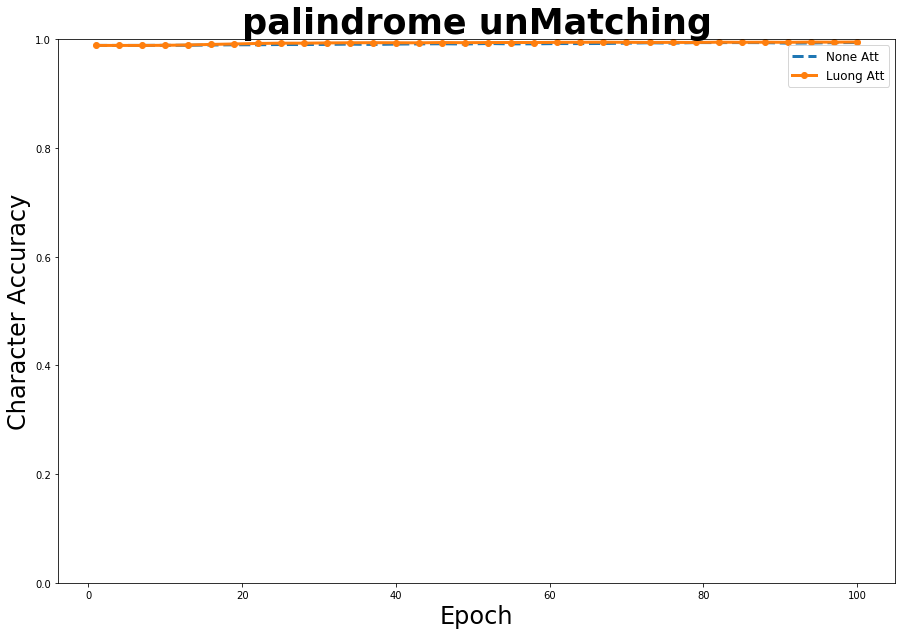

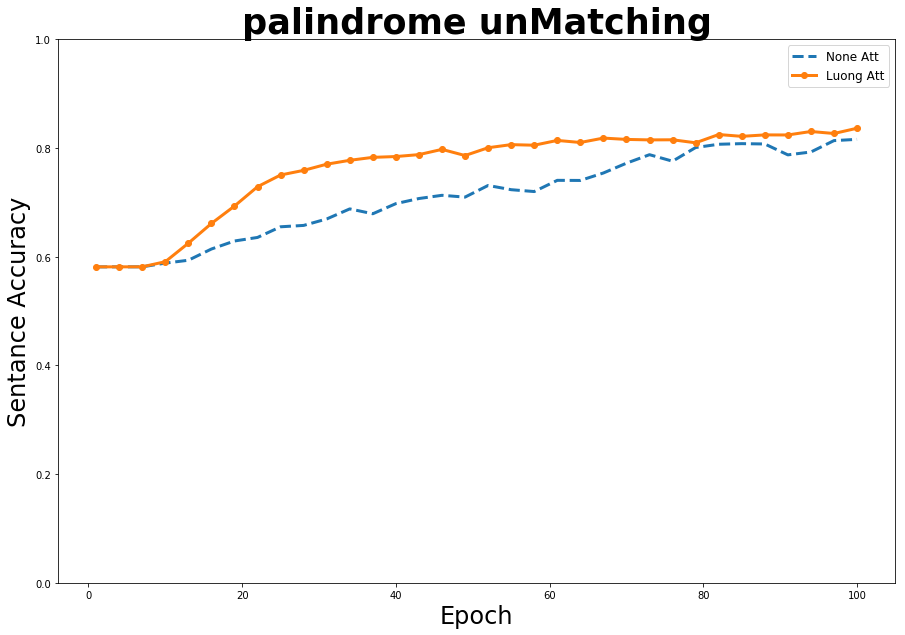

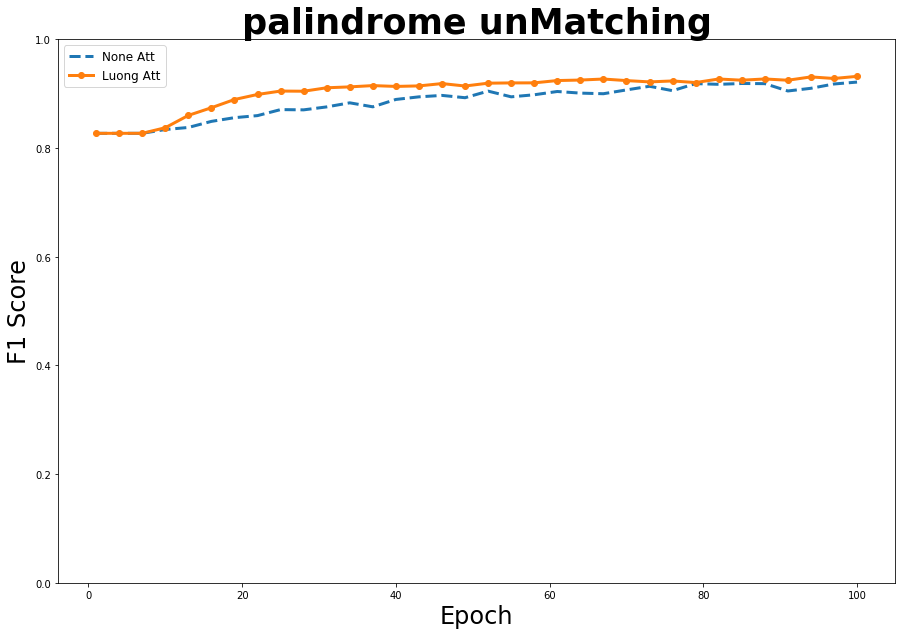

In [12]:
epochs = list(range(1, 101, 1))
plt.figure(figsize=(15,10))
plt.plot(epochs[::3], character_accuracy[0][::3], '--', LineWidth=3, label="None Att")
plt.plot(epochs[::3], character_accuracy[1][::3], '-o', LineWidth=3, label="Luong Att")
plt.legend(loc="best", fontsize=12)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Character Accuracy', fontsize=24)
plt.ylim([0, 1])
plt.title('palindrome unMatching', fontsize=35, fontweight=560)
plt.savefig('log/plot/palindrome_dedup_unMatching_single_parameter/epoch_to_character_accuracy.png')

plt.figure(figsize=(15,10))
plt.plot(epochs[::3], sentance_accuracy[0][::3], '--', LineWidth=3, label="None Att")
plt.plot(epochs[::3], sentance_accuracy[1][::3], '-o', LineWidth=3, label="Luong Att")
plt.legend(loc="best", fontsize=12)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Sentance Accuracy', fontsize=24)
plt.ylim([0, 1])
plt.title('palindrome unMatching', fontsize=35, fontweight=560)
plt.savefig('log/plot/palindrome_dedup_unMatching_single_parameter/epoch_to_sentance_accuracy.png')

plt.figure(figsize=(15,10))
plt.plot(epochs[::3], f1_score[0][::3], '--', LineWidth=3, label="None Att")
plt.plot(epochs[::3], f1_score[1][::3], '-o', LineWidth=3, label="Luong Att")
plt.legend(loc="best", fontsize=12)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('F1 Score', fontsize=24)
plt.ylim([0, 1])
plt.title('palindrome unMatching', fontsize=35, fontweight=560)
plt.savefig('log/plot/palindrome_dedup_unMatching_single_parameter/epoch_to_f1_score.png')

In [13]:
print(character_accuracy[0])
print(character_accuracy[1])

[0.9885367291605882, 0.98854165583255, 0.98854165583255, 0.98854165583255, 0.98854165583255, 0.98854165583255, 0.98854165583255, 0.98854165583255, 0.9885564358484359, 0.9887288693671032, 0.9887595242148663, 0.9888230235423757, 0.988858057654105, 0.9888854280538935, 0.9891098653321589, 0.9893370396504033, 0.9894585642254642, 0.9894623960814346, 0.9897382897113025, 0.9896983289276113, 0.9896840963197213, 0.9897815349429683, 0.9900026877732593, 0.9901214753083413, 0.9902380732114402, 0.9901882590838251, 0.990283508075089, 0.9901827850038675, 0.9899348091817838, 0.9898526979824184, 0.9904088645061203, 0.9909097428222495, 0.9908571916546556, 0.9909568199098857, 0.9908758035265118, 0.9902260302355332, 0.990302667354941, 0.9900968419485316, 0.9910400259252427, 0.9909924014296108, 0.9909694102937884, 0.991321941043064, 0.9913843455545818, 0.9913170143711021, 0.990846790902736, 0.9916301317446824, 0.9912639157955124, 0.9913120876991401, 0.991160455684312, 0.9909420398939999, 0.9917762896795528,

In [14]:
print(sentance_accuracy[0])
print(sentance_accuracy[1])

[0.5811343403020907, 0.5812343703110934, 0.5812343703110934, 0.5812343703110934, 0.5812343703110934, 0.5812343703110934, 0.5812343703110934, 0.5812343703110934, 0.5817745323597079, 0.5880764229268781, 0.5910173051915575, 0.593297989396819, 0.5933580074022207, 0.5941782534760428, 0.6081624487346203, 0.6140042012603781, 0.6188856656997099, 0.6172451735520657, 0.6287686305891768, 0.6319495848754626, 0.635110533159948, 0.6353105931779534, 0.6413123937181154, 0.649074722416725, 0.6549164749424827, 0.6571571471441432, 0.6596378913674102, 0.6574372311693508, 0.6641792537761328, 0.6542362708812643, 0.6693007902370711, 0.6839851955586675, 0.685665699709913, 0.6878263479043714, 0.695628688606582, 0.6758027408222467, 0.6788836650995299, 0.6830649194758428, 0.6936480944283285, 0.6975292587776333, 0.6985895768730619, 0.7073121936580974, 0.7069120736220866, 0.7098929678903672, 0.6980694208262479, 0.712813844153246, 0.7084725417625287, 0.714774432329699, 0.7095128538561568, 0.7042112633790137, 0.7230

In [15]:
print(f1_score[0])
print(f1_score[1])

[0.8267921687992655, 0.8268537206763061, 0.8268537206763061, 0.8268537206763061, 0.8268537206763061, 0.8268537206763061, 0.8268537206763061, 0.8268537206763061, 0.8273290282038349, 0.833847241750742, 0.8361213333224053, 0.8373642928490724, 0.8376361089035091, 0.8395225355684821, 0.845839106163357, 0.8488175333770533, 0.8512284555866058, 0.8502610173606896, 0.8556389040919481, 0.8559356685293716, 0.8570401265640731, 0.8594382004508465, 0.8637976540758637, 0.8672461101682818, 0.8705055292259084, 0.8710743801652893, 0.8724383432325059, 0.8700278612916935, 0.8671795072044984, 0.8707468236752401, 0.8754689844922461, 0.8824922856341364, 0.8841200384818297, 0.8829553141693038, 0.8849121402060585, 0.8747965210920422, 0.8755877454587706, 0.8743444223996062, 0.8873291695009585, 0.8891637727035249, 0.8861396809755497, 0.8929286728312167, 0.8939584741077461, 0.892298260403096, 0.8901909191041488, 0.8966020349395277, 0.8906852782145185, 0.8926733942993238, 0.8923595745654861, 0.8892601649478272, 0.